<a href="https://colab.research.google.com/github/SagarSudani/Data-Analysis-projects/blob/main/Coca_Cola%20Analysis%20using%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

In [4]:
# Load a dataset from Google Drive
#df = pd.read_csv('file path')  #if you use csv file
df = pd.read_excel('/content/coca cola.xlsx') #if you use excel file

**Importing dataset**

In [5]:
# Display the first few rows
print(df.head())

  Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Walmart      1185732   2021-01-14  Northeast  New York  New York   
1  Walmart      1185732   2021-01-14  Northeast  New York  New York   
2  Walmart      1185732   2021-01-14  Northeast  New York  New York   
3  Walmart      1185732   2021-01-14  Northeast  New York  New York   
4  Walmart      1185732   2021-01-14  Northeast  New York  New York   

  Beverage Brand  Days to Deliver Delivery Company  Units_Price  Units Sold  \
0      Coca-Cola               25             USPS         0.50       12000   
1      Diet Coke               34            FedEx         0.50       10000   
2         Sprite               48              UPS         0.40       10000   
3          Fanta               20             USPS         0.45        8500   
4       Powerade               26             USPS         0.60        9000   

   Total Sales  Operating Profit  Operating Margin  Year Month Name  
0       6000.0           300

In [6]:
df.shape       #get each rows and columns

(3744, 16)

In [7]:
df.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Beverage Brand              object
Days to Deliver              int64
Delivery Company            object
Units_Price                float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Year                         int64
Month Name                  object
dtype: object

In [8]:
df.rename(columns={'Days to Deliver': 'Delivery_Days'}, inplace=True)          #change column name

In [9]:
df.describe()

Retailer ID                   Invoice Date  Delivery_Days  \
count  3.744000e+03                           1000    3744.000000   
mean   1.176706e+06  2021-06-23 21:38:52.800000256      37.174145   
min    1.128299e+06            2021-01-02 00:00:00      15.000000   
25%    1.185732e+06            2021-03-19 00:00:00      26.000000   
50%    1.185732e+06            2021-06-20 00:00:00      37.000000   
75%    1.185732e+06            2021-09-18 18:00:00      49.000000   
max    1.197831e+06            2021-12-19 00:00:00      60.000000   
std    2.400406e+04                            NaN      13.304029   

       Units_Price    Units Sold  Total Sales  Operating Profit  \
count  3744.000000   3744.000000  3744.000000       3744.000000   
mean      0.480288   4402.377137  2194.221421        812.270800   
min       0.100000      0.000000     0.000000          0.000000   
25%       0.400000   2500.000000  1050.000000        367.500000   
50%       0.500000   4000.000000  1885.000000        665.000000   
75%       0.550000   5750.000000  3000.000000       1080.000000   
max       1.100000  12750.000000  8250.000000       3900.000000   
std       0.145381   2275.420055  1456.333026        599.473408   

       Operating Margin    Year  
count       3744.000000  3744.0  
mean           0.366493  2022.0  
min            0.100000  2022.0  
25%            0.300000  2022.0  
50%            0.350000  2022.0  
75%            0.400000  2022.0  
max            0.650000  2022.0  
std            0.075231     0.0

**Data Wrangling**

In [10]:
df.isna()   #check missing value using true and false

Retailer  Retailer ID  Invoice Date  Region  State   City  \
0        False        False         False   False  False  False   
1        False        False         False   False  False  False   
2        False        False         False   False  False  False   
3        False        False         False   False  False  False   
4        False        False         False   False  False  False   
...        ...          ...           ...     ...    ...    ...   
3739     False        False          True   False  False  False   
3740     False        False          True   False  False  False   
3741     False        False          True   False  False  False   
3742     False        False          True   False  False  False   
3743     False        False          True   False  False  False   

      Beverage Brand  Delivery_Days  Delivery Company  Units_Price  \
0              False          False             False        False   
1              False          False             False        False   
2              False          False             False        False   
3              False          False             False        False   
4              False          False             False        False   
...              ...            ...               ...          ...   
3739           False          False             False        False   
3740           False          False             False        False   
3741           False          False             False        False   
3742           False          False             False        False   
3743           False          False             False        False   

      Units Sold  Total Sales  Operating Profit  Operating Margin   Year  \
0          False        False             False             False  False   
1          False        False             False             False  False   
2          False        False             False             False  False   
3          False        False             False             False  False   
4          False        False             False             False  False   
...          ...          ...               ...               ...    ...   
3739       False        False             False             False  False   
3740       False        False             False             False  False   
3741       False        False             False             False  False   
3742       False        False             False             False  False   
3743       False        False             False             False  False   

      Month Name  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
3739       False  
3740       False  
3741       False  
3742       False  
3743       False  

[3744 rows x 16 columns]

In [11]:
# Check for missing values
mising_value=print(df.isna().sum())      #count missing value


Retailer               0
Retailer ID            0
Invoice Date        2744
Region                 0
State                  0
City                   0
Beverage Brand         0
Delivery_Days          0
Delivery Company       0
Units_Price            0
Units Sold             0
Total Sales            0
Operating Profit       0
Operating Margin       0
Year                   0
Month Name             0
dtype: int64


In [12]:
print("number of NaN values for the column Invoice date :", df['Invoice Date'].isnull().sum())   #count missing values for columns by adding column name

number of NaN values for the column Invoice date : 2744


In [13]:
mean=df['Invoice Date'].mean()
df['Invoice Date'].replace(np.nan,mean, inplace=True)      #using replace() funtion fill missing values

<ipython-input-13-728a2330a638>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Invoice Date'].replace(np.nan,mean, inplace=True)      #using replace() funtion fill missing values


In [14]:
print("number of NaN values for the column Invoice Date :", df['Invoice Date'].isnull().sum())

number of NaN values for the column Invoice Date : 0


In [15]:
df.style.format({ "Operating Profit":'{:,.0f}'.format,
                 "Total Sales":'{:,.0f}'.format,
                 "Operating Margin":'{:,.2f}'.format,
                 "Units_Price":'{:,.2f}'.format,})                       #change decimal values

**Exploratory Data Analysis**

In [16]:
df['Beverage Brand'].groupby(df['Retailer']).value_counts().to_frame()            #count beveragesbrand by retailer

count
Retailer Beverage Brand       
CVS      Coca-Cola         120
         Dasani Water      120
         Diet Coke         120
         Fanta             120
         Powerade          120
         Sprite            120
Costco   Coca-Cola          96
         Dasani Water       96
         Diet Coke          96
         Fanta              96
         Powerade           96
         Sprite             96
Target   Coca-Cola          24
         Dasani Water       24
         Diet Coke          24
         Fanta              24
         Powerade           24
         Sprite             24
Walmart  Coca-Cola         384
         Dasani Water      384
         Diet Coke         384
         Fanta             384
         Powerade          384
         Sprite            384

<Axes: xlabel='Beverage Brand', ylabel='Units Sold'>

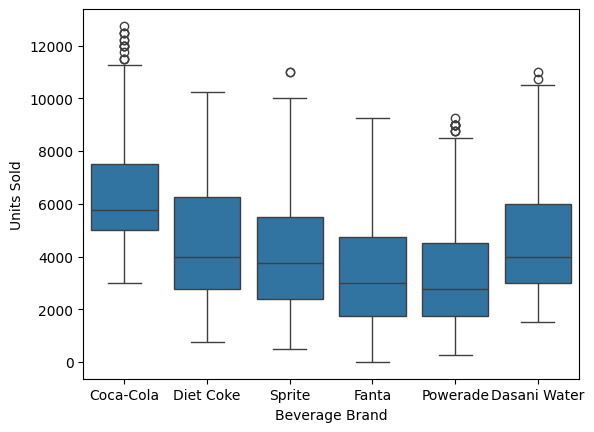

In [17]:
sns.boxplot(x='Beverage Brand', y='Units Sold', data=df)

<Axes: xlabel='Total Sales', ylabel='Operating Profit'>

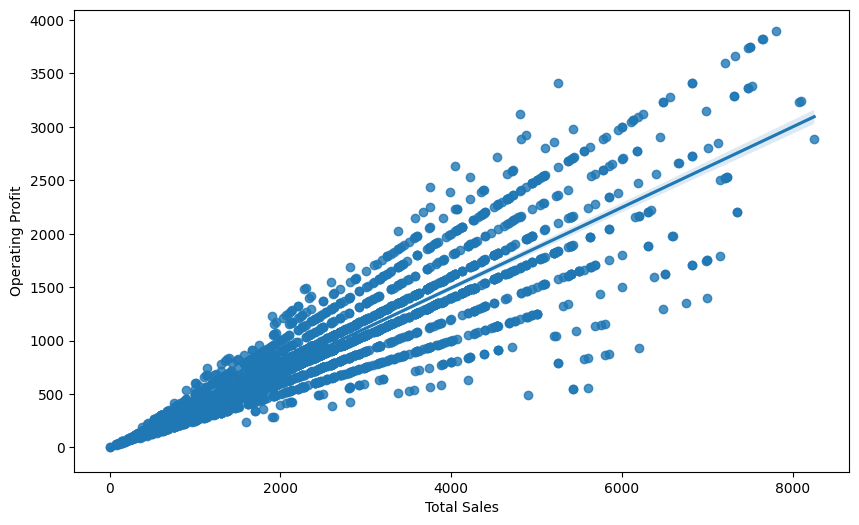

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Sales',y='Operating Profit',data=df)

In [19]:
X = df[['Units_Price']]                                                  #Predict price by using Total Sale
Y = df['Total Sales']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4057275130034035

In [24]:
KPI=['Units Sold','Total Sales','Operating Profit','Operating Margin']

In [32]:
X=df[KPI]                                                                        #predict price by diffrent KPIs
Y=df['Units_Price']
Im= LinearRegression()
Im.fit(X,Y)
Im.score(X,Y)

0.8287400645428318

In [30]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [31]:
Z = df[KPI]                                                                     #create pipeline to predict Price
Y = df['Units_Price']
pipe = Pipeline(Input)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
pipe.score(Z,Y)

0.956356595772225

In [33]:
if 'Total Sales' in df.columns and 'Units Sold' in df.columns:
    df['Revenue per Unit'] = df['Total Sales'] / df['Units Sold']            # Group data by 'Beverage Brand' and analyze performance
if 'Beverage Brand' in df.columns:
    brand_summary = df.groupby('Beverage Brand').agg({
        'Total Sales': 'sum',
        'Operating Profit': 'sum',
        'Units Sold': 'sum',
        'Revenue per Unit': 'mean'
    })
    print("\nPerformance by Beverage Brand:")
    print(brand_summary)



Performance by Beverage Brand:
                Total Sales  Operating Profit  Units Sold  Revenue per Unit
Beverage Brand                                                             
Coca-Cola         1923052.5        767510.375     3989000          0.474519
Dasani Water      1639062.5        618630.000     2890500          0.549840
Diet Coke         1391087.5        473805.625     2872000          0.463702
Fanta              969887.5        355685.000     2100000          0.433682
Powerade          1133675.0        416421.250     2042500          0.537340
Sprite            1158400.0        409089.625     2588500          0.422997


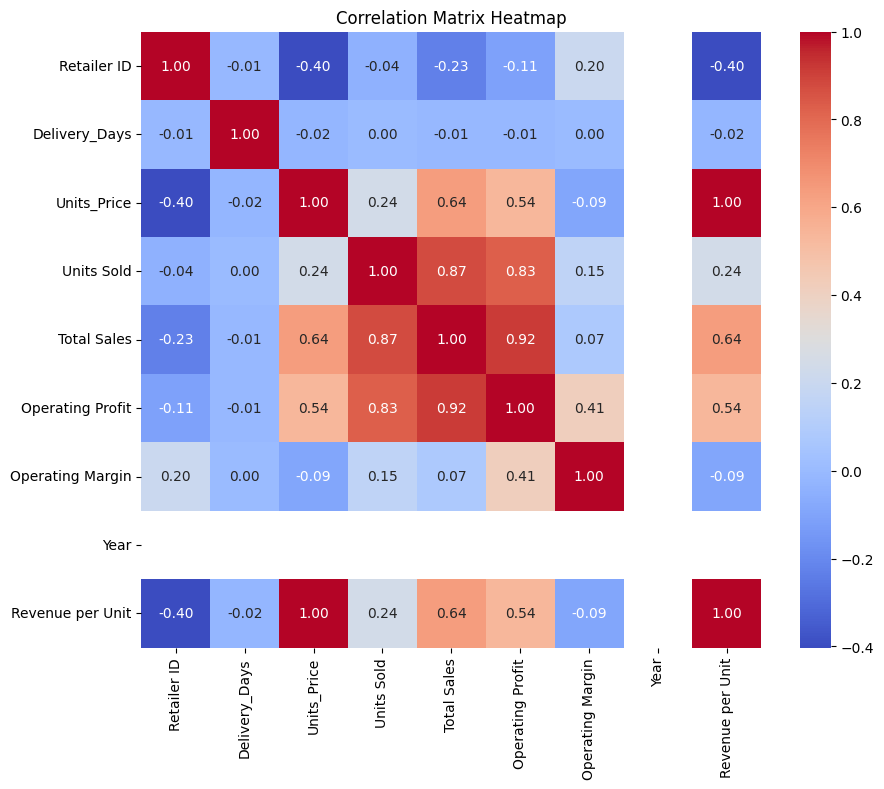

In [43]:
numeric_df = df.select_dtypes(include=np.number)                     #  Correlation Matrix for numeric columns
correlation_matrix = numeric_df.corr()                                # Calculate correlation on numeric_df
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

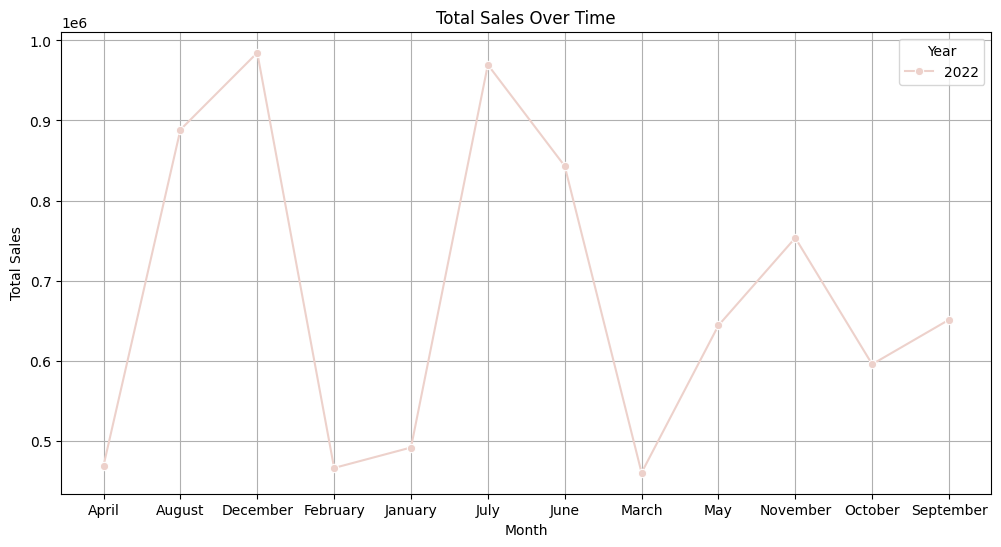

In [42]:
if 'Year' in df.columns and 'Month Name' in df.columns:                                             # Time Series Analysis
    time_series_data = df.groupby(['Year', 'Month Name']).agg({'Total Sales': 'sum'}).reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=time_series_data, x='Month Name', y='Total Sales', hue='Year', marker='o')
    plt.title('Total Sales Over Time')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.legend(title='Year')
    plt.grid()
    plt.show()


**Model Evalution and Refinement**

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [36]:
KPI=['Units Sold','Total Sales','Operating Profit','Operating Margin']     #split the data into traning and testing sets
X = df[KPI]
Y = df['Units_Price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 562
number of training samples: 3182


In [38]:
RidgeModel = Ridge(alpha=0.1)                                      #Create and fit a Ridge regression object using the training data
RidgeModel.fit(x_train,y_train)
yhat = RidgeModel.predict(x_test)
RidgeModel.score(x_test,y_test)

0.8413904762263611

In [39]:
pr=PolynomialFeatures(degree=2)                 #Perform a second order polynomial transform on both the training data and testing data
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr,y_train)
yhat = RidgeModel.predict(x_test_pr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.45415e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [40]:
RidgeModel.score(x_test_pr,y_test)

0.9590998625702762

In [ ]:
# Save cleaned and analyzed data to a new Excel file
output_file = 'analyzed_data.xlsx'
df.to_excel(output_file, index=False)
print(f"\nCleaned and analyzed data saved to {output_file}")


Cleaned and analyzed data saved to analyzed_data.xlsx
